# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# Testing key
cities_test = ["london","mexico","paris"]
url = "https://api.openweathermap.org/data/2.5/weather?"


In [5]:

for city in cities_test:
    params = {
        "q": city,
        "appid": api_key
    }
    res = requests.get(url, params)
    print(res.json())

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 285.2, 'pressure': 1003, 'humidity': 87, 'temp_min': 283.15, 'temp_max': 287.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1559697966, 'sys': {'type': 1, 'id': 1414, 'message': 0.0081, 'country': 'GB', 'sunrise': 1559706396, 'sunset': 1559765497}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
{'coord': {'lon': -70.55, 'lat': 44.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.7, 'pressure': 1012, 'humidity': 44, 'temp_min': 283.71, 'temp_max': 288.15}, 'visibility': 16093, 'wind': {'speed': 2.6}, 'clouds': {'all': 90}, 'dt': 1559698556, 'sys': {'type': 1, 'id': 3469, 'message': 0.0056, 'country': 'US', 'sunrise': 1559638752, 'sunset': 1559694126}, 'timezone': -14400, 'id': 4971871, 

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter 
record = 1

print(f"Connecting to OpenWeatherMap API")
print(f"===================================")

# Loop through all cities in the list
for city in cities:  
    params = {
        "q": city,
        "appid": api_key
    }
    
    try: 
        response = requests.get(url, params).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Add to counter
        record= record + 1
        
        # API rate limit
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("No match found. Skipping to next city.")
    continue

Connecting to OpenWeatherMap API
Processing Record 1 | Fort Nelson
https://api.openweathermap.org/data/2.5/weather?&q=fort nelson
No match found. Skipping to next city.
Processing Record 2 | Satipo
https://api.openweathermap.org/data/2.5/weather?&q=satipo
Processing Record 3 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?&q=ushuaia
Processing Record 4 | Port-Gentil
https://api.openweathermap.org/data/2.5/weather?&q=port-gentil
Processing Record 5 | Kumbo
https://api.openweathermap.org/data/2.5/weather?&q=kumbo
Processing Record 6 | Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?&q=puerto ayora
Processing Record 7 | Rikitea
https://api.openweathermap.org/data/2.5/weather?&q=rikitea
Processing Record 8 | Ribeira Grande
https://api.openweathermap.org/data/2.5/weather?&q=ribeira grande
Processing Record 9 | Dimbokro
https://api.openweathermap.org/data/2.5/weather?&q=dimbokro
Processing Record 10 | Jamestown
https://api.openweathermap.org/data/2.5/weather?&q=jamesto

Processing Record 86 | Henties Bay
https://api.openweathermap.org/data/2.5/weather?&q=henties bay
Processing Record 87 | Bambous Virieux
https://api.openweathermap.org/data/2.5/weather?&q=bambous virieux
Processing Record 88 | Saint George
https://api.openweathermap.org/data/2.5/weather?&q=saint george
Processing Record 89 | Copiapo
https://api.openweathermap.org/data/2.5/weather?&q=copiapo
Processing Record 90 | Hofn
https://api.openweathermap.org/data/2.5/weather?&q=hofn
Processing Record 91 | Caravelas
https://api.openweathermap.org/data/2.5/weather?&q=caravelas
Processing Record 92 | Lorengau
https://api.openweathermap.org/data/2.5/weather?&q=lorengau
Processing Record 93 | Umm Kaddadah
https://api.openweathermap.org/data/2.5/weather?&q=umm kaddadah
Processing Record 94 | Saint-Philippe
https://api.openweathermap.org/data/2.5/weather?&q=saint-philippe
Processing Record 95 | Port Hueneme
https://api.openweathermap.org/data/2.5/weather?&q=port hueneme
Processing Record 96 | Talnakh
h

Processing Record 170 | Panorama
https://api.openweathermap.org/data/2.5/weather?&q=panorama
Processing Record 171 | Turan
https://api.openweathermap.org/data/2.5/weather?&q=turan
No match found. Skipping to next city.
Processing Record 172 | Sola
https://api.openweathermap.org/data/2.5/weather?&q=sola
Processing Record 173 | Kamenka
https://api.openweathermap.org/data/2.5/weather?&q=kamenka
Processing Record 174 | Promyshlennovskiy
https://api.openweathermap.org/data/2.5/weather?&q=promyshlennovskiy
Processing Record 175 | Necochea
https://api.openweathermap.org/data/2.5/weather?&q=necochea
Processing Record 176 | Antofagasta
https://api.openweathermap.org/data/2.5/weather?&q=antofagasta
Processing Record 177 | Povenets
https://api.openweathermap.org/data/2.5/weather?&q=povenets
Processing Record 178 | Kiunga
https://api.openweathermap.org/data/2.5/weather?&q=kiunga
Processing Record 179 | Clyde River
https://api.openweathermap.org/data/2.5/weather?&q=clyde river
Processing Record 180

Processing Record 255 | Nouadhibou
https://api.openweathermap.org/data/2.5/weather?&q=nouadhibou
Processing Record 256 | Naze
https://api.openweathermap.org/data/2.5/weather?&q=naze
Processing Record 257 | Codrington
https://api.openweathermap.org/data/2.5/weather?&q=codrington
Processing Record 258 | Lengshuijiang
https://api.openweathermap.org/data/2.5/weather?&q=lengshuijiang
Processing Record 259 | San Carlos de Bariloche
https://api.openweathermap.org/data/2.5/weather?&q=san carlos de bariloche
Processing Record 260 | Semirom
https://api.openweathermap.org/data/2.5/weather?&q=semirom
Processing Record 261 | Scarborough
https://api.openweathermap.org/data/2.5/weather?&q=scarborough
No match found. Skipping to next city.
Processing Record 262 | Catuday
https://api.openweathermap.org/data/2.5/weather?&q=catuday
Processing Record 263 | Reconquista
https://api.openweathermap.org/data/2.5/weather?&q=reconquista
Processing Record 264 | Sonaguera
https://api.openweathermap.org/data/2.5/we

No match found. Skipping to next city.
Processing Record 337 | Kiama
https://api.openweathermap.org/data/2.5/weather?&q=kiama
Processing Record 338 | Bonfim
https://api.openweathermap.org/data/2.5/weather?&q=bonfim
Processing Record 339 | Hobyo
https://api.openweathermap.org/data/2.5/weather?&q=hobyo
Processing Record 340 | Barra dos Coqueiros
https://api.openweathermap.org/data/2.5/weather?&q=barra dos coqueiros
Processing Record 341 | Port Jervis
https://api.openweathermap.org/data/2.5/weather?&q=port jervis
Processing Record 342 | Jumla
https://api.openweathermap.org/data/2.5/weather?&q=jumla
Processing Record 343 | Bouna
https://api.openweathermap.org/data/2.5/weather?&q=bouna
Processing Record 344 | Hamilton
https://api.openweathermap.org/data/2.5/weather?&q=hamilton
Processing Record 345 | Flagstaff
https://api.openweathermap.org/data/2.5/weather?&q=flagstaff
No match found. Skipping to next city.
Processing Record 346 | Auchi
https://api.openweathermap.org/data/2.5/weather?&q=au

Processing Record 421 | Bambanglipuro
https://api.openweathermap.org/data/2.5/weather?&q=bambanglipuro
Processing Record 422 | North Battleford
https://api.openweathermap.org/data/2.5/weather?&q=north battleford
Processing Record 423 | Jammu
https://api.openweathermap.org/data/2.5/weather?&q=jammu
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weatherpy_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_data = pd.DataFrame(weatherpy_dictionary)

# Display count
weather_data.count()

City          423
Cloudiness    423
Country       423
Date          423
Humidity      423
Lat           423
Lng           423
Max Temp      423
Wind Speed    423
dtype: int64

In [9]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

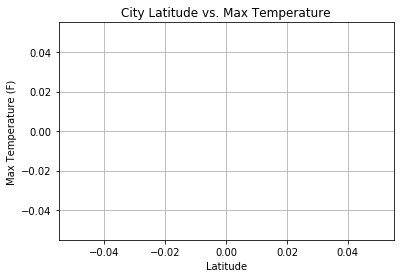

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

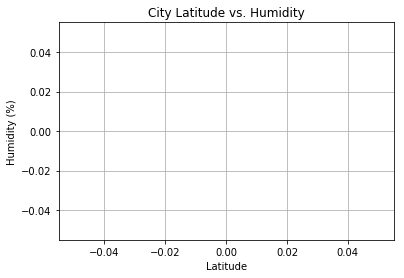

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

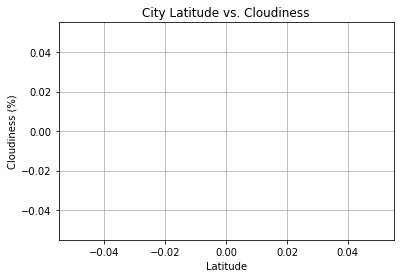

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeed_v_Latitude.png")
plt.show()